<a href="https://colab.research.google.com/github/saishrane06/Exploratory-Data-Analysis/blob/main/Car_Purchase_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download gabrielsantello/cars-purchase-decision-dataset

  0% 0.00/6.13k [00:00<?, ?B/s]
100% 6.13k/6.13k [00:00<00:00, 5.93MB/s]


In [ ]:
! unzip cars-purchase-decision-dataset.zip

Archive:  cars-purchase-decision-dataset.zip
  inflating: car_data.csv            


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
car_df = pd.read_csv("car_data.csv")
car_df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
car_df.shape

(1000, 5)

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
car_df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [ ]:
car_df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [ ]:
for i in car_df.columns:
  if car_df[i].dtype == "object":
    print("\n")
    print(i,end="\n")
    print(car_df[i],end="\n")
    print("\n")
    print("Unique values of {} is".format(i),car_df[i].unique())



Gender
0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
995      Male
996    Female
997    Female
998    Female
999    Female
Name: Gender, Length: 1000, dtype: object


Unique values of Gender is ['Male' 'Female']


In [ ]:
car_df.isna().any()

User ID         False
Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

In [ ]:
for i in car_df.columns:
  if car_df[i].isna().any():
    print(i," ",car_df[i].isna().sum())

### **Univariate Analysis**

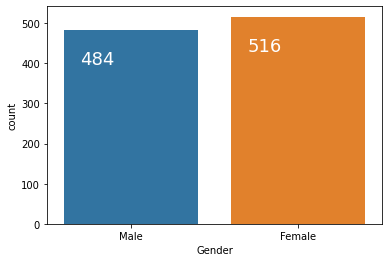

In [ ]:
gender_count = sns.countplot(x=car_df['Gender'])
for p in gender_count.patches:
    gender_count.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

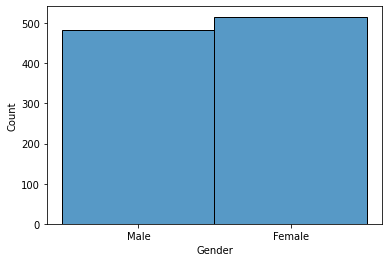

In [ ]:
sns.histplot(x=car_df['Gender'])

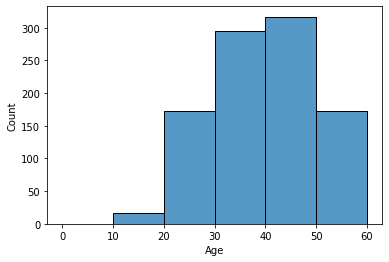

In [ ]:
sns.histplot(x=car_df['Age'],bins=[0,10,20,30,40,50,60])
## age between 40-50 buys car more, followed by 30-40

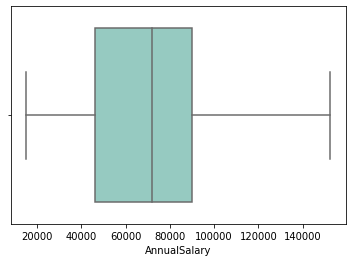

In [ ]:
sns.boxplot(x=car_df['AnnualSalary'],palette='Set3')

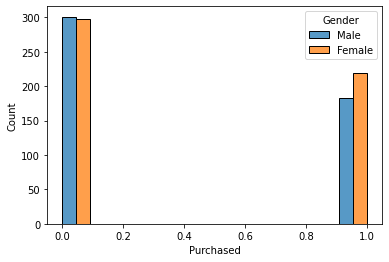

In [88]:
sns.histplot(x=car_df['Purchased'],hue=car_df['Gender'],multiple="dodge")
## form this we get an idea that female purchase the car more as compared to male.

### **Bivariate Analysis**

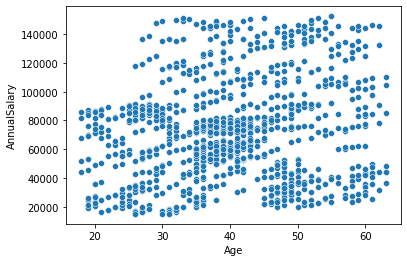

In [54]:
sns.scatterplot(y=car_df['AnnualSalary'],x=car_df['Age'])

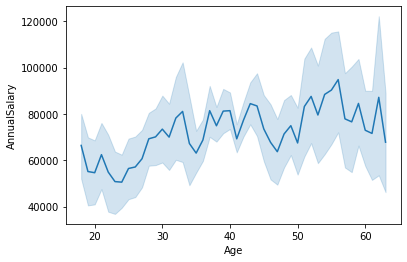

In [57]:
sns.lineplot(y=car_df['AnnualSalary'],x=car_df['Age'])

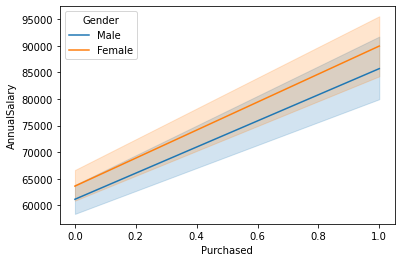

In [80]:
sns.lineplot(y=car_df['AnnualSalary'],x=car_df['Purchased'],hue=car_df['Gender'])

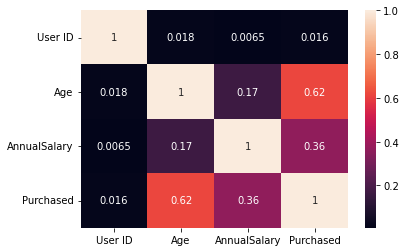

In [59]:
sns.heatmap(car_df.corr(),annot=True)

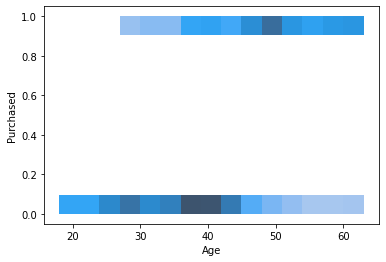

In [76]:
sns.histplot(x=car_df['Age'],y=car_df['Purchased'])

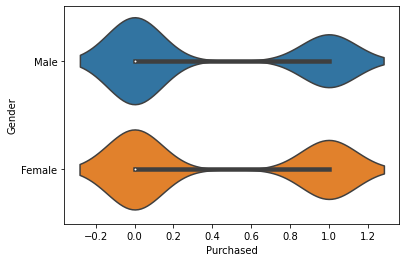

In [ ]:
sns.violinplot(y=car_df['Gender'],x=car_df['Purchased'])

### **Multi-Variate Analysis**

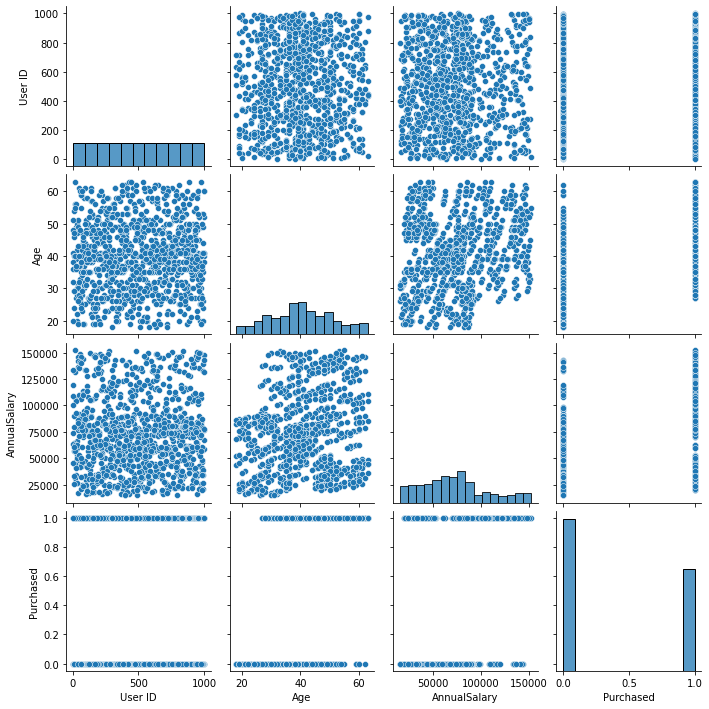

In [81]:
sns.pairplot(car_df)

### **Label Encoding**

In [89]:
from sklearn import preprocessing

In [90]:
lbl_encode = preprocessing.LabelEncoder()
car_df['Gender'] = lbl_encode.fit_transform(car_df['Gender'])

### **Train Test Split**

In [94]:
X = car_df.drop('Purchased',axis=1)
y = car_df['Purchased']

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
print(X_train.shape,X_test.shape)

(700, 4) (300, 4)


**Using Logistic Regression**

In [96]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [97]:
y_predict = classifier.predict(X_test)

In [99]:
print(y_predict)

[1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1
 1 0 0 0]


In [104]:
from sklearn import metrics
print("Accuracy of the model : ",metrics.accuracy_score(y_test,y_predict))

Accuracy of the model :  0.6033333333333334


**Using Support Vector Classifier (SVC)**

In [105]:
from sklearn.svm import SVC
classifier = SVC(random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [113]:
y_pred = classifier.predict(X_test)

In [114]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


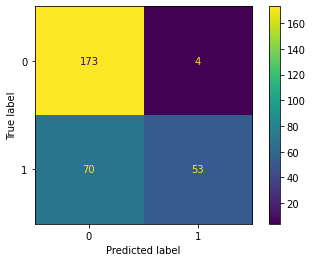

In [109]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  

In [115]:
from sklearn import metrics
print("Accuracy of the model : ",metrics.accuracy_score(y_test,y_pred))

Accuracy of the model :  0.7566666666666667
